In [2]:
"""
Ryan Shuhart
MSDS 7330 - 402
November 2, 2015

resources:
http://pandas.pydata.org/pandas-docs/version/0.16.2/io.html#io-read-csv-table
http://stackoverflow.com/questions/30408450/python-long-string-on-multiple-line

Q1
https://www.youtube.com/watch?v=CNQet_kL8z4

Q2
http://learnpythonthehardway.org/book/ex39.html

Q3
http://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

Q4
http://stackoverflow.com/questions/30970342/remove-punctuation-from-a-list
https://docs.python.org/3/tutorial/controlflow.html
http://docs.sqlalchemy.org/en/latest/dialects/sqlite.html#module-sqlalchemy.dialects.sqlite.pysqlite
https://www.sqlite.org/datatype3.html
http://stackoverflow.com/questions/9758450/pandas-convert-dataframe-to-array-of-tuples
2DS 11.5 Demonstration of Python Database Access by Prof. Tyler Moore
http://stackoverflow.com/questions/21287624/pandas-dataframe-column-type-conversion
"""
import pandas as pd
from collections import defaultdict


#import text list as a pandas data frame.  Using pandas because of my familiarity with it.
scrabble = pd.read_csv(r"C:\Users\ryan.shuhart\Google Drive\SMU\Class Work\Fall 2015"\
                    "\File Organization and Database Management\Homeworks\HW4\ospd.txt",
                    header=None, names=['Word'])

In [3]:
scrabble.head()

,Word
0,aa
1,aah
2,aahed
3,aahing
4,aahs


In [4]:
#Questions #1-3

#Define function to 
def anagrams(words):
    table = defaultdict(list)
    
    for w in words:
        table[''.join(sorted(w.lower()))].append(w)
    
    anagrams = [v for k, v in table.items() if len(v) > 1]
    anagram_lengths = [len(v) for k, v in table.items() if len(v) > 1]
    anagram_keys = [k for k, v in table.items() if len(v) > 1]
    longest_anagram = [v for k, v in table.items() if len(v) == max(anagram_lengths)]
    longest_anagram_key = [k for k, v in table.items() if len(v) == max(anagram_lengths)]
    return anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key
    
anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key = anagrams(scrabble.Word)


In [5]:
print("Question 1:  How many unique anagrams are in the scrabble word list?\n")
print("There are "+str(len(anagrams))+" anagrams in the scabble dictionary.")

Question 1:  How many unique anagrams are in the scrabble word list?

There are 9796 anagrams in the scabble dictionary.


In [6]:
print("Question 2: What is the anagram with the largest number of words in the word list? \n \
How many words are in this anagram?")
print("The longest anagram is: " + str(longest_anagram[0]))
print(len(longest_anagram[0]))

Question 2: What is the anagram with the largest number of words in the word list? 
 How many words are in this anagram?
The longest anagram is: ['apers', 'apres', 'asper', 'pares', 'parse', 'pears', 'prase', 'presa', 'rapes', 'reaps', 'spare', 'spear']
12


Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.
       Anagram Lengths
count      9796.000000
mean          2.383830
std           0.816171
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000


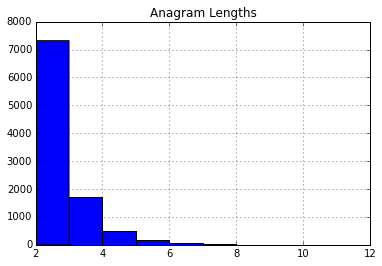

In [7]:
print("Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.")
import matplotlib.pyplot as plt
%matplotlib inline
df_anagram_lengths = pd.DataFrame(anagram_lengths, columns=['Anagram Lengths'])

df_anagram_lengths.hist()
print(df_anagram_lengths.describe())

In [8]:
anagrams_no_punc = []
for i in range(0,len(anagrams)):
    anagrams_no_punc.append(str(anagrams[i]).translate(str.maketrans('','', "[]'' ")))
    
len(anagrams_no_punc)
#print(str(anagrams[0]).translate(str.maketrans('','', "[]'' ")))

9796

In [33]:
#Question 4
df=pd.DataFrame()
df = pd.DataFrame(anagram_keys, columns=['Anagram'])
df['Number_of_Anagrams'] = anagram_lengths
#Numbers are as int64 type which does not work well with sqlite
df['Number_of_Anagrams'] = df['Number_of_Anagrams'].astype(int)
df['Anagram_Words'] = pd.DataFrame(anagrams_no_punc)


In [20]:
df.head(20)

,Anagram,Number_of_Anagrams,Anagram_Words
0,aaghmnoy,2,"hogmanay,mahogany"
1,ailopsst,2,"apostils,topsails"
2,dmosu,2,"doums,modus"
3,frsu,2,"furs,surf"
4,aeipsst,4,"pasties,patsies,petsais,tapises"
5,aglru,2,"gular,rugal"
6,deginn,2,"ending,ginned"
7,denor,2,"drone,redon"
8,adoty,2,"toady,today"
9,acddist,2,"addicts,didacts"


In [52]:
import sqlite3
conn = sqlite3.connect("C:\\Users\\ryan.shuhart\\Google Drive\\SMU\\Class Work\\Fall 2015"\
                    "\\File Organization and Database Management\\Homeworks\HW4\\database.db")
c = conn.cursor()

#Create table
c.execute('''CREATE TABLE data
(Anagram Text, Number_of_Anagrams Text, Anagram_Words Text)''')
#c.execute('INSERT INTO data VALUES ("test",1,"rest")')
conn.commit()


In [51]:
conn.close()

In [53]:
#tuples = [tuple(x) for x in subset.values]
tupes=[]
for x in df.itertuples(index=False):
    tupes.append(x)


In [54]:
#conn = sqlite3.connect("C:\\Users\\ryan.shuhart\\Google Drive\\SMU\\Class Work\\Fall 2015"\
#                    "\\File Organization and Database Management\\Homeworks\HW4\\database.db")#

#c = conn.cursor()
c.executemany('INSERT INTO data VALUES (?,?,?)',tupes)
#c.executemany('INSERT INTO data (Number_of_Anagrams) VALUES (?)',tuple(anagram_lengths))

conn.commit()




In [55]:
c.execute('SELECT * FROM data')
print(c.fetchall())
conn.close()

[('aaghmnoy', b'\x02\x00\x00\x00', 'hogmanay,mahogany'), ('ailopsst', b'\x02\x00\x00\x00', 'apostils,topsails'), ('dmosu', b'\x02\x00\x00\x00', 'doums,modus'), ('frsu', b'\x02\x00\x00\x00', 'furs,surf'), ('aeipsst', b'\x04\x00\x00\x00', 'pasties,patsies,petsais,tapises'), ('aglru', b'\x02\x00\x00\x00', 'gular,rugal'), ('deginn', b'\x02\x00\x00\x00', 'ending,ginned'), ('denor', b'\x02\x00\x00\x00', 'drone,redon'), ('adoty', b'\x02\x00\x00\x00', 'toady,today'), ('acddist', b'\x02\x00\x00\x00', 'addicts,didacts'), ('adeiprst', b'\x02\x00\x00\x00', 'rapidest,traipsed'), ('aceilpst', b'\x02\x00\x00\x00', 'septical,tieclasp'), ('beglrsu', b'\x03\x00\x00\x00', 'buglers,bulgers,burgles'), ('cdeoy', b'\x02\x00\x00\x00', 'coyed,decoy'), ('acdefrt', b'\x02\x00\x00\x00', 'crafted,fracted'), ('aaimrt', b'\x02\x00\x00\x00', 'amrita,tamari'), ('degilns', b'\x03\x00\x00\x00', 'dingles,engilds,singled'), ('bekrsu', b'\x02\x00\x00\x00', 'burkes,busker'), ('alst', b'\x05\x00\x00\x00', 'alts,last,lats,sal

In [50]:
tupes[0][1] = int(tupes[0][1])

TypeError: 'tuple' object does not support item assignment

In [42]:
tuple(anagram_lengths)

(2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 5,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 5,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 4,
 2,
 2,
